<a href="https://colab.research.google.com/github/mmmhdp/nlp_labs/blob/main/HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Дифференцирование

Поскольку каждую задачу легко загуглить, пожалуйста, постарайтесь понять, что происходит. "Просто ответы" не будут засчитаны, обязательно приведите вывод решения. Хороший способ вывести решение для этих задач -- вывести его для отдельных компонентов, а затем обобщить на результирующую матрицу/вектор.

Полезные ссылки: [1](http://www.machinelearning.ru/wiki/images/2/2a/Matrix-Gauss.pdf), [2](https://www.atmos.washington.edu/~dennis/MatrixCalculus.pdf)

### Упражнение 1

Дифференцирование скаляра по вектору:
$$  
y = c^Tx,  \quad x \in \mathbb{R}^N
$$
$$
\frac{dy}{dx} = \ \ ?
$$

### Упражнение 2

Дифференцирование вектора по вектору:
$$ y = \sum_{j=1}^{N} cx^T \quad c \in \mathbb{R}^{M} ,x \in \mathbb{R}^{N}, cx^T \in \mathbb{R}^{M \times N} $$
$$
\frac{dy}{dx} = \ \ ?
$$

Дифференцирование вектора по вектору чуть сложнее.
$$  
y = x x^T x , x \in \mathbb{R}^{N}
$$

$$
\frac{dy}{dx} = \ \ ?
$$

## Решение



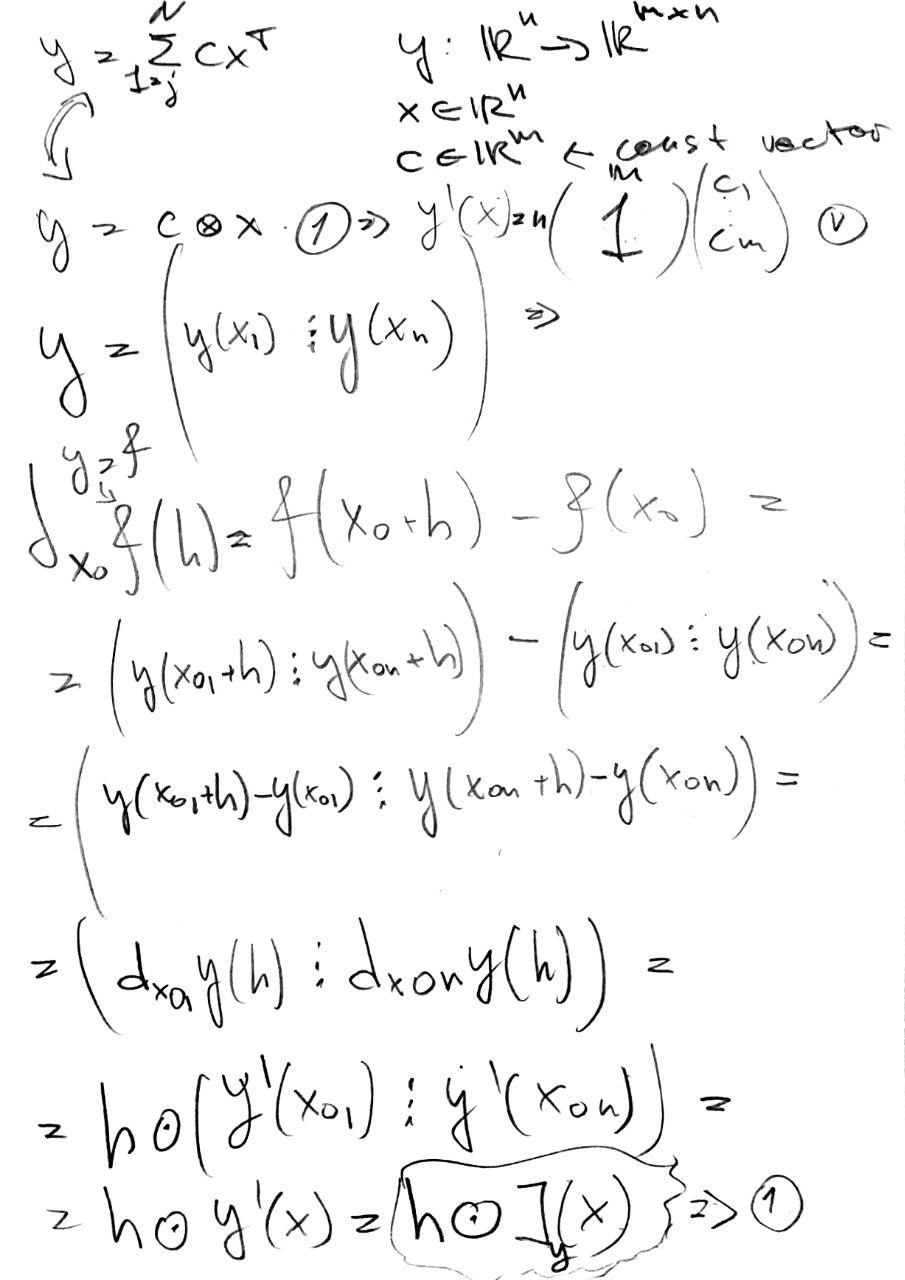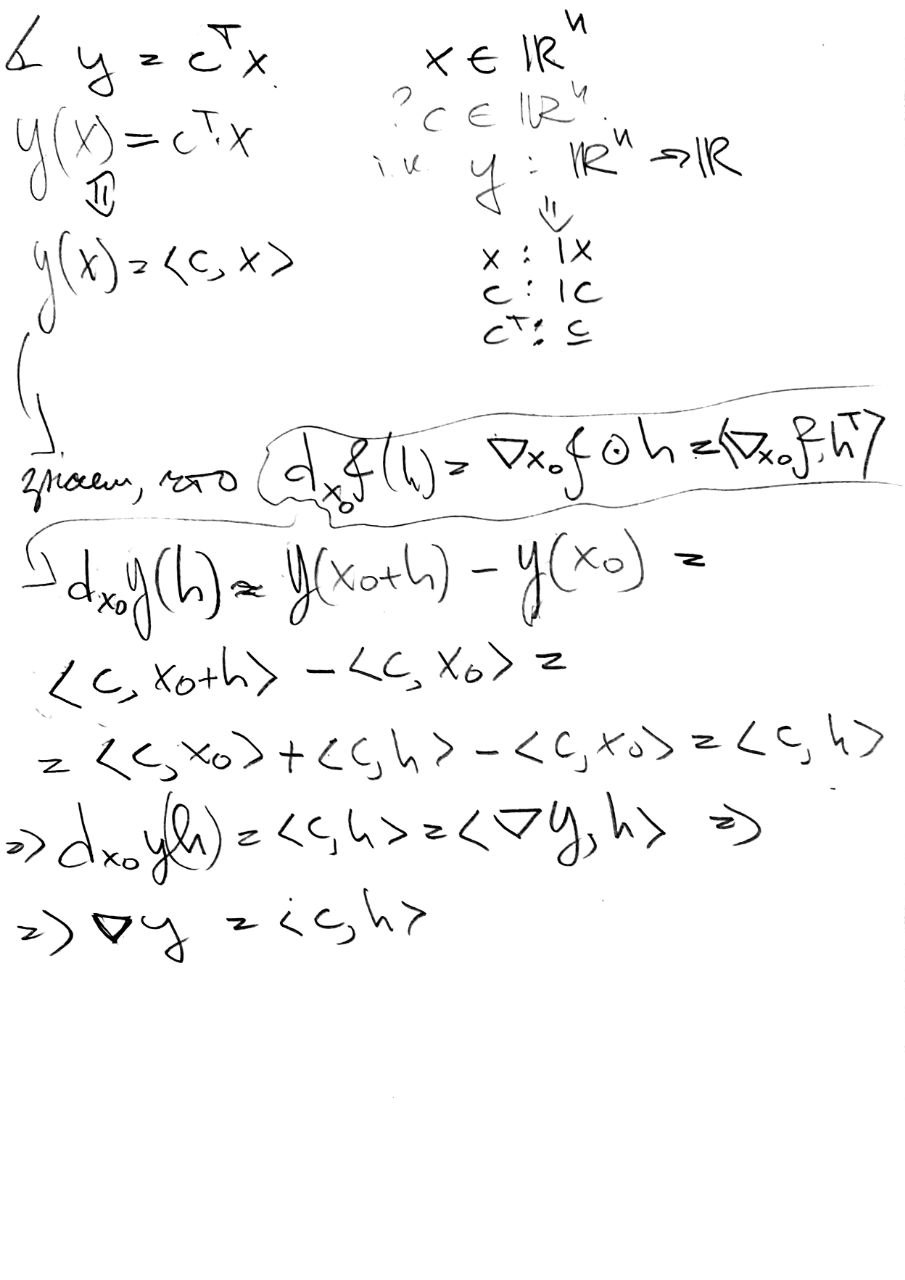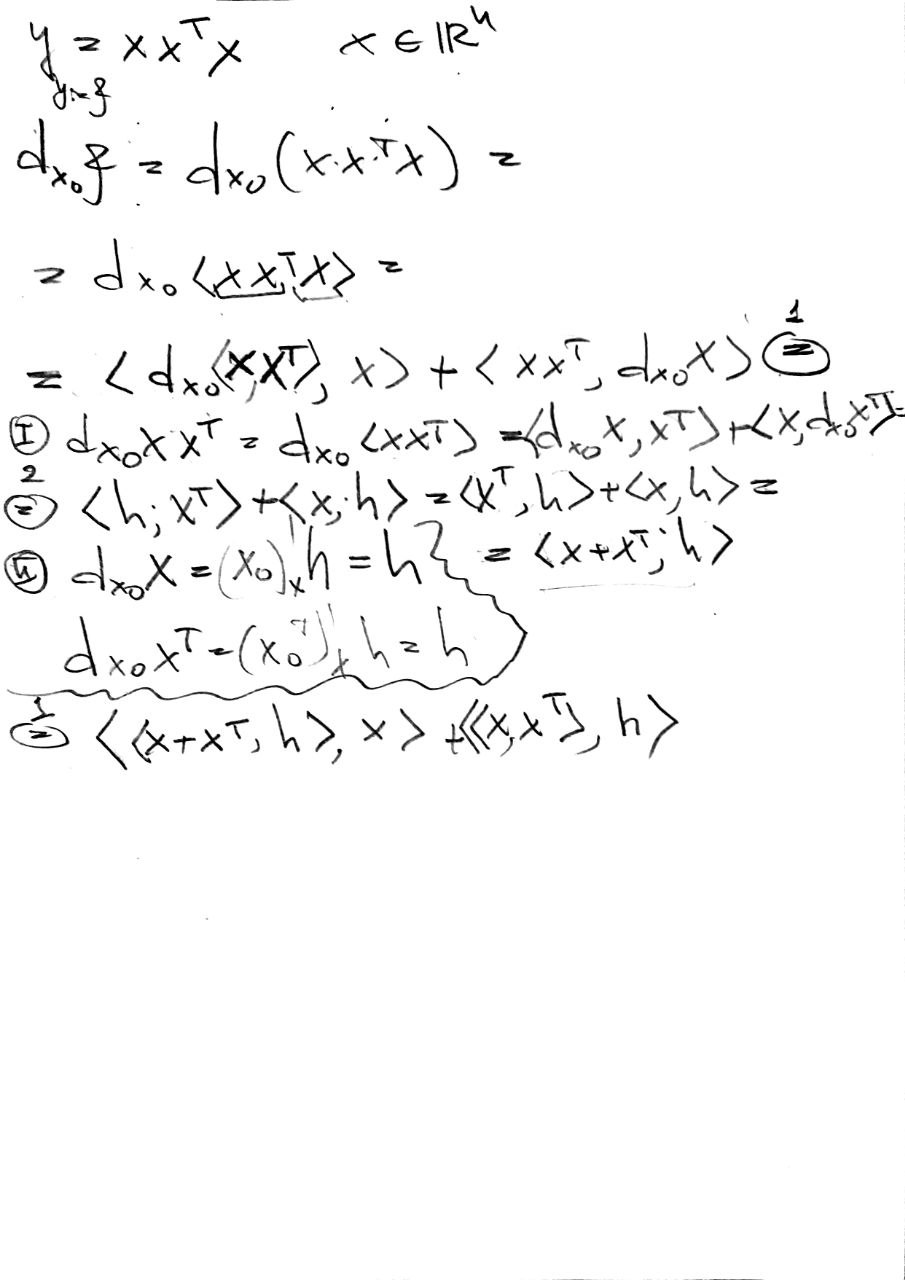

## Broadcasting

При изучении таких фреймворков тензорного программирования, как PyTorch или Jax, очень заманчиво полагаться на стандартную библиотеку/StackOverflow или ChatGPT, чтобы найти волшебную функцию для всего. Но на практике тензорный язык чрезвычайно выразителен, и вы можете сделать большинство вещей, основываясь на первых принципах и умном использовании broadcasting-a.

Автор задач: [Саша Раш](https://rush-nlp.com/)

In [232]:
!pip install -qqq torchtyping hypothesis pytest git+https://github.com/chalk-diagrams/chalk
!wget -q https://github.com/srush/Tensor-Puzzles/raw/main/lib.py

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done


In [233]:
from lib import draw_examples, make_test, run_test
import torch
import numpy as np
from torchtyping import TensorType as TT
tensor = torch.tensor

### Правила

1. Это задачи о бродкастинге!
2. Каждую задачку нужно решить в одну строчку (< 80 символов)
3. Вам разрешено: @, арифметические операции, сравнения, `shape`, любые индексирования  (например, `a[:j], a[:, None], a[arange(10)]`), и результаты предыдущих задач.
4. Ничего другого нельзя. Никаких `view`, `sum`, `take`, `squeeze`, `tensor`.
5. Вы можете начать со следующих двух функций  `arange` и  `where`.

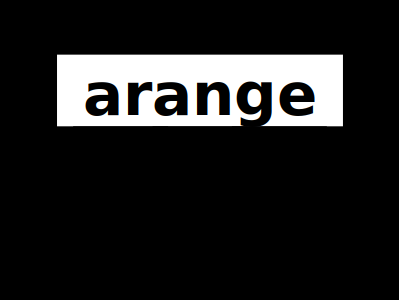

In [234]:
def arange(i: int):
    "Use this function to replace a for-loop."
    return torch.tensor(range(i))

draw_examples("arange", [{"" : arange(i)} for i in [5]])

In [235]:
x = [
    arange(9)
]
y = x[0:1]
type(y[0:1])

list

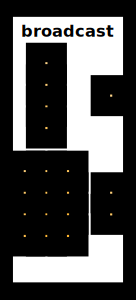

In [236]:
# Пример broadcast-инга.
examples = [(arange(4), arange(5)[:, None]) ,
            (arange(3)[:, None], arange(2))]
draw_examples("broadcast", [{"a": a, "b":b, "ret": a + b} for a, b in examples])

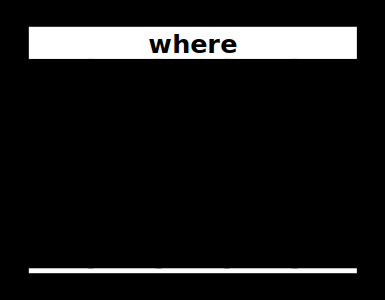

In [237]:
def where(q, a, b):
    "Use this function to replace an if-statement."
    return (q * a) + (~q) * b

# На диаграмах, оранжевый -- это positive/True, а голубой -- это negative.

examples = [(tensor([False]), tensor([10]), tensor([0])),
            (tensor([False, True]), tensor([1, 1]), tensor([-10, 0])),
            (tensor([False, True]), tensor([1]), tensor([-10, 0])),
            (tensor([[False, True], [True, False]]), tensor([1]), tensor([-10, 0])),
            (tensor([[False, True], [True, False]]), tensor([[0], [10]]), tensor([-10, 0])),
           ]
draw_examples("where", [{"q": q, "a":a, "b":b, "ret": where(q, a, b)} for q, a, b in examples])

### Задача 1 - ones

Вычислите [ones](https://numpy.org/doc/stable/reference/generated/numpy.ones.html) - вектор всех единиц.

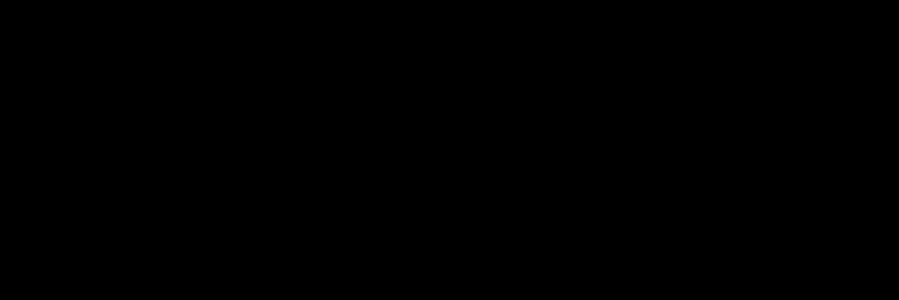

In [238]:
def ones_spec(out):
    for i in range(len(out)):
        out[i] = 1

def ones(i: int) -> TT["i"]:
    return arange(i) - arange(i) + 1

def zeros(i: int) -> TT["i"]:
    return arange(i) - arange(i)

test_ones = make_test("one", ones, ones_spec, add_sizes=["i"])

In [239]:
run_test(test_ones)

Correct!


### Задача 2 - sum

Вычислите [sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) - сумму значений вектора.

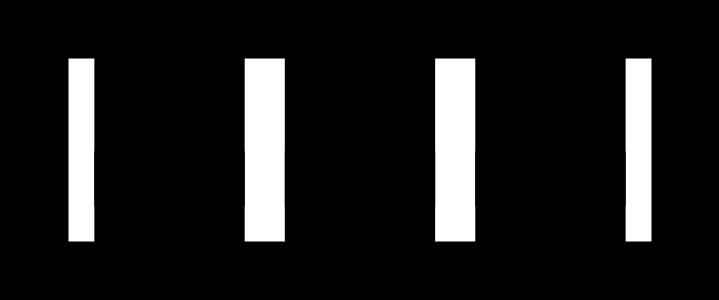

In [240]:
def sum_spec(a, out):
    out[0] = 0
    for i in range(len(a)):
        out[0] += a[i]

def sum(a: TT["i"]) -> TT[1]:
    return (a @ ones(a.shape[0])) * ones(1)

test_sum = make_test("sum", sum, sum_spec)

In [241]:
run_test(test_sum)

Correct!


### Задача 3 - outer

Вычислите [outer](https://numpy.org/doc/stable/reference/generated/numpy.outer.html) - внешнее произведение двух векторов.

In [242]:
x = torch.arange(3) + 1
y = torch.tensor([4,5])
x,y

(tensor([1, 2, 3]), tensor([4, 5]))

In [243]:
x.shape, y.shape

(torch.Size([3]), torch.Size([2]))

In [244]:
torch.outer(x,y)

tensor([[ 4,  5],
        [ 8, 10],
        [12, 15]])

In [245]:
(ones(y.shape[0])[None,:].T @ x[None,:]).T * (ones(x.shape[0])[None,:].T @ y[None,:])

tensor([[ 4,  5],
        [ 8, 10],
        [12, 15]])

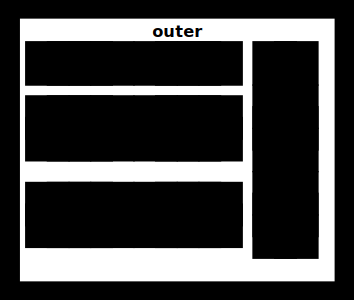

In [246]:
def outer_spec(a, b, out):
    for i in range(len(out)):
        for j in range(len(out[0])):
            out[i][j] = a[i] * b[j]

def outer(x: TT["i"], y: TT["j"]) -> TT["i", "j"]:
    return (ones(y.shape[0])[None,].T@x[None,]).T*(ones(x.shape[0])[None,].T@y[None,])

test_outer = make_test("outer", outer, outer_spec)

In [247]:
run_test(test_outer)

Correct!


### Задача 4 - diag

Вычислите [diag](https://numpy.org/doc/stable/reference/generated/numpy.diag.html) - вектор диагонали квадратной матрицы

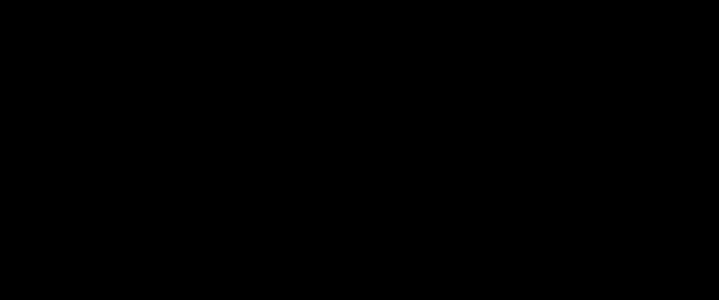

In [248]:
def diag_spec(a, out):
    for i in range(len(a)):
        out[i] = a[i][i]

def diag(a: TT["i", "i"]) -> TT["i"]:
    return a[arange(a.shape[0]), arange(a.shape[1])]

test_diag = make_test("diag", diag, diag_spec)

In [249]:
run_test(test_diag)

Correct!


### Задача 5 - eye

Вычислите [eye](https://numpy.org/doc/stable/reference/generated/numpy.eye.html) - единичную матрицу произвольного размера

In [250]:
where(((arange(3)+10)[None,:].T @ (arange(3)+1)[None,])==((arange(3)+10)[None,:].T @ (arange(3)+1)[None,]).T,1,0)

tensor([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]])

In [251]:
ones(3)[None,:].T @ arange(3)[None,:] == (ones(3)[None,:].T @ arange(3)[None,:]).T

tensor([[ True, False, False],
        [False,  True, False],
        [False, False,  True]])

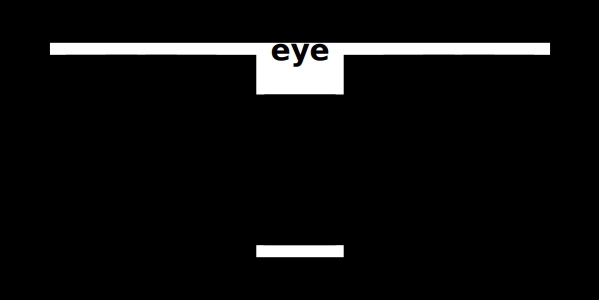

In [252]:
def eye_spec(out):
    for i in range(len(out)):
        out[i][i] = 1

def eye(j: int) -> TT["j", "j"]:
    return where((ones(j)[None,].T @ arange(j)[None,])==(ones(j)[None,].T @ arange(j)[None,]).T,1,0)

test_eye = make_test("eye", eye, eye_spec, add_sizes=["j"])

In [253]:
run_test(test_eye)

Correct!


## MNIST and backward pass

Ваша задача состоит в том, чтобы написать "с нуля" MLP с одним внутренним слоем и обучить его на MNIST.

Для начала напишите производную гиперболического тангенса.

Теперь реализуйте производную функции потерь.

По заданному forward pass, реализуйте backward pass. В функции не должно быть циклов. Используйте `torch.t`, `torch.mv`, `torch.mm`, и `torch.view`. Главная сложность здесь -- это правильно разобраться с размерами тензоров и транспонированием.

Загрузите MNIST-датасет из Pytorch в соответствующие переменные.

In [254]:
from torchvision import datasets
mnist = datasets.MNIST(root="./data",train=True, download=True)
mnist_test = datasets.MNIST(root="./data",train=False, download=True)

In [255]:
train_input, train_target, test_input, test_target = mnist.data, mnist.targets, mnist_test.data, mnist_test.targets

nb_classes = len(mnist.classes)
nb_train_samples = train_input.shape[0]

In [256]:
train_input.shape, test_input.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [257]:
train_buff = torch.ones(60000*28*28).reshape(60000,784)
test_buff = torch.ones(10000*28*28).reshape(10000,784)

for ind, el in enumerate(train_input):
    train_buff[ind] = train_input[ind].view(-1)
train_input = train_buff

for ind, el in enumerate(test_input):
    test_buff[ind] = test_input[ind].view(-1)
test_input = test_buff

In [258]:
train_input.shape, test_input.shape

(torch.Size([60000, 784]), torch.Size([10000, 784]))

In [259]:
mu, std = train_input.mean(), train_input.std()

train_input.sub_(mu).div_(std)
test_input.sub_(mu).div_(std)

tensor([[-0.4241, -0.4241, -0.4241,  ..., -0.4241, -0.4241, -0.4241],
        [-0.4241, -0.4241, -0.4241,  ..., -0.4241, -0.4241, -0.4241],
        [-0.4241, -0.4241, -0.4241,  ..., -0.4241, -0.4241, -0.4241],
        ...,
        [-0.4241, -0.4241, -0.4241,  ..., -0.4241, -0.4241, -0.4241],
        [-0.4241, -0.4241, -0.4241,  ..., -0.4241, -0.4241, -0.4241],
        [-0.4241, -0.4241, -0.4241,  ..., -0.4241, -0.4241, -0.4241]])

Если вы все сделали правильно, то следующий код тренировки должен заработать. Не бойтесь модифицировать и отлаживать его тоже.

In [260]:
mnist.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [261]:
one_hot_train_target = torch.nn.functional.one_hot(train_target, num_classes = 10)
one_hot_test_target = torch.nn.functional.one_hot(test_target, num_classes = 10)

## Теор выкладки, на которые опирался при написании

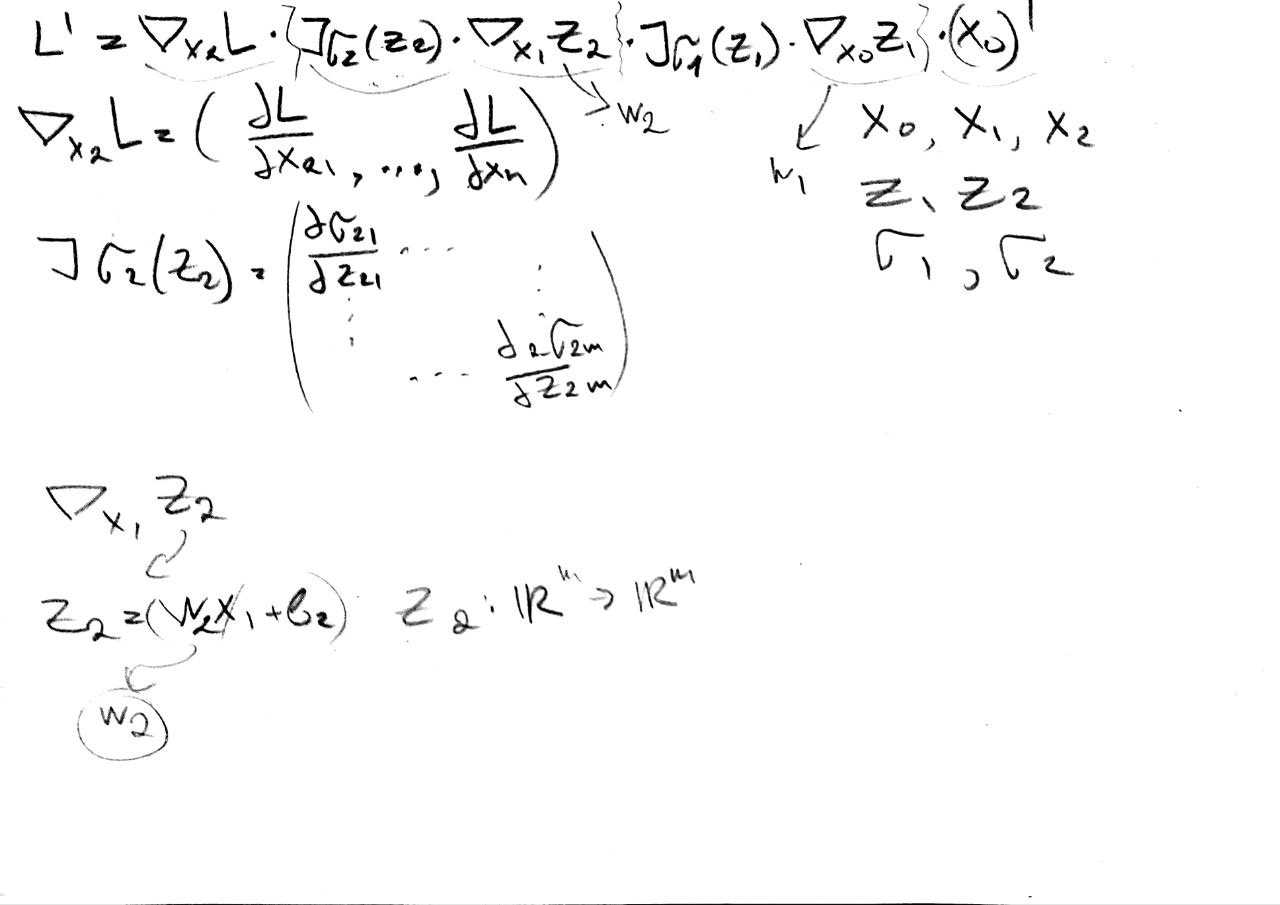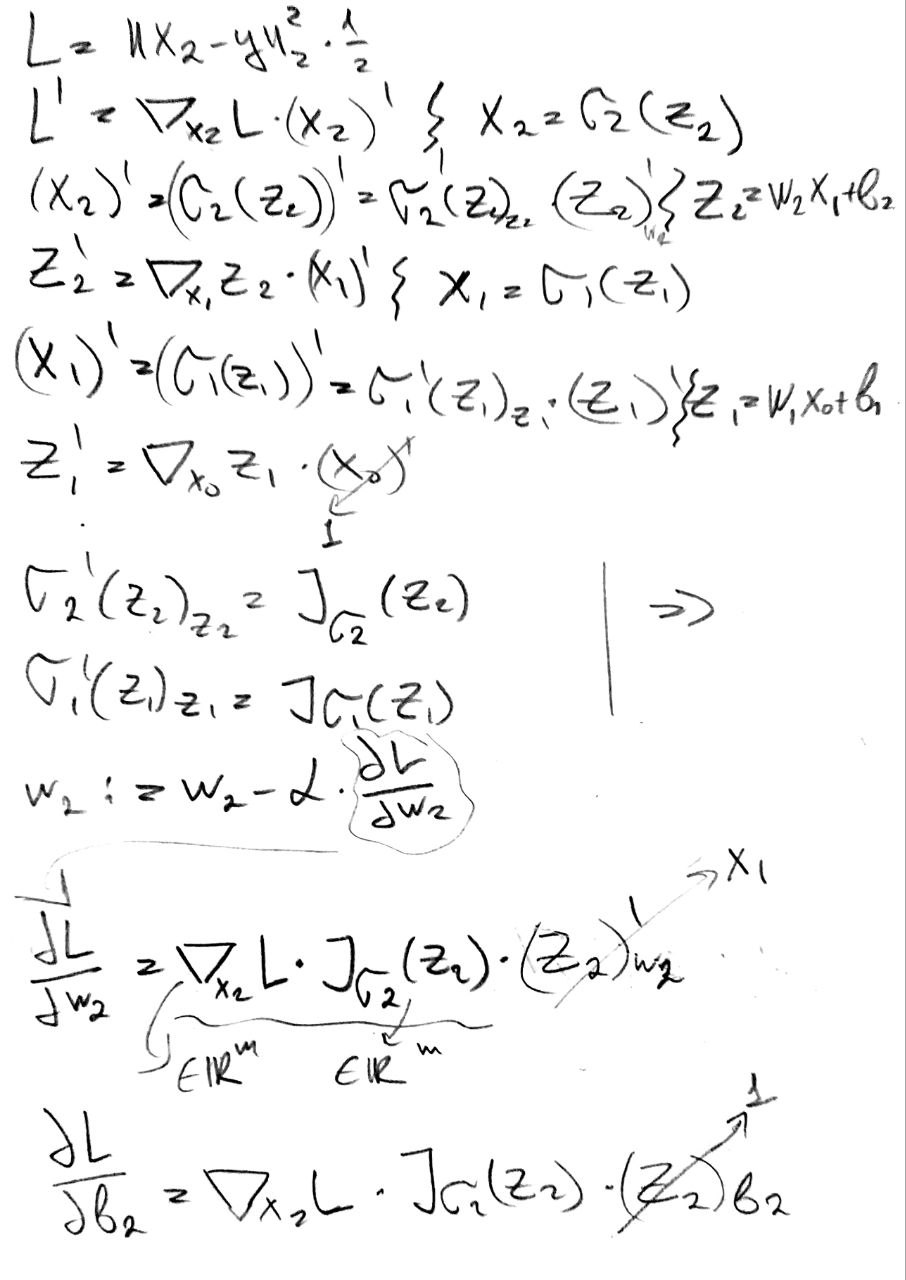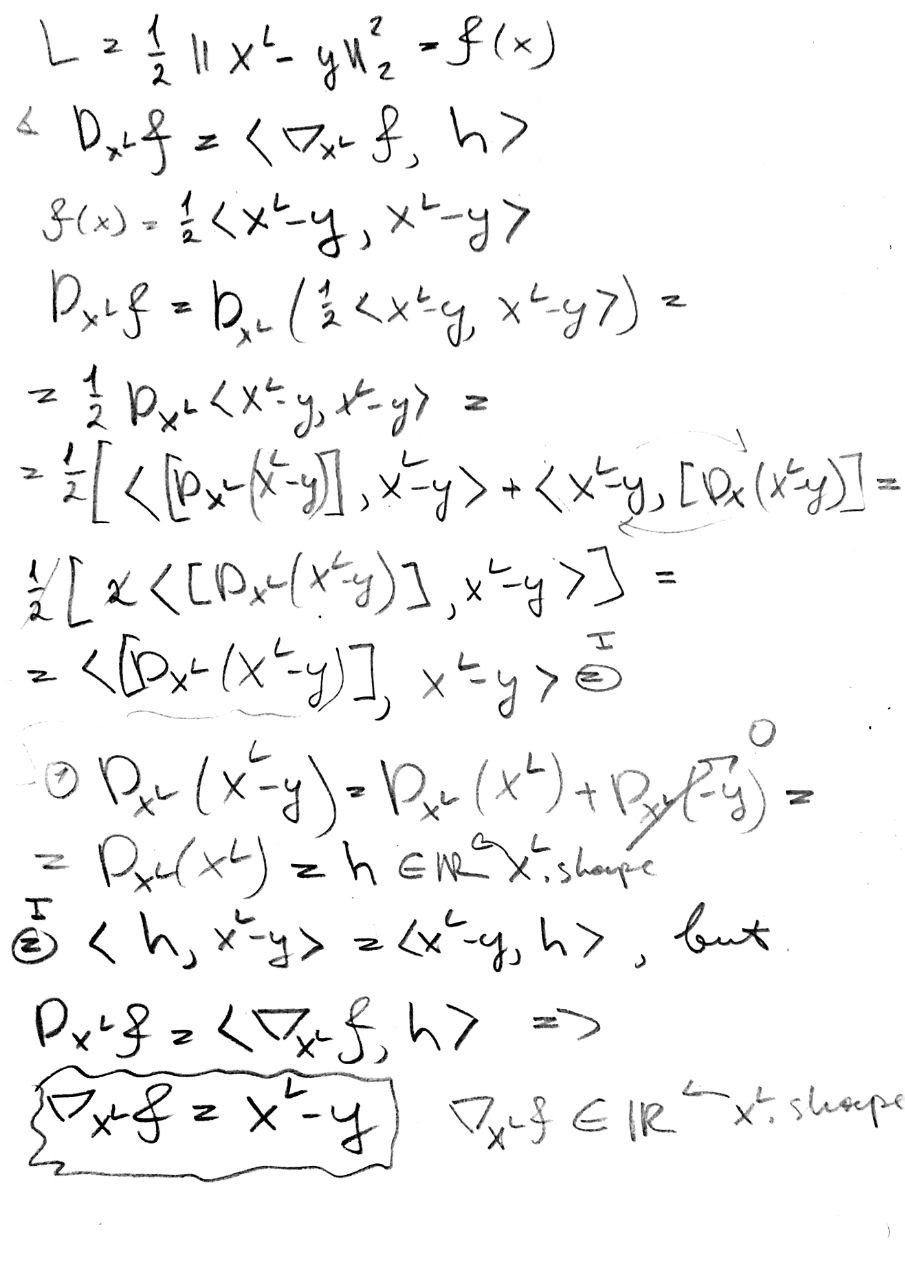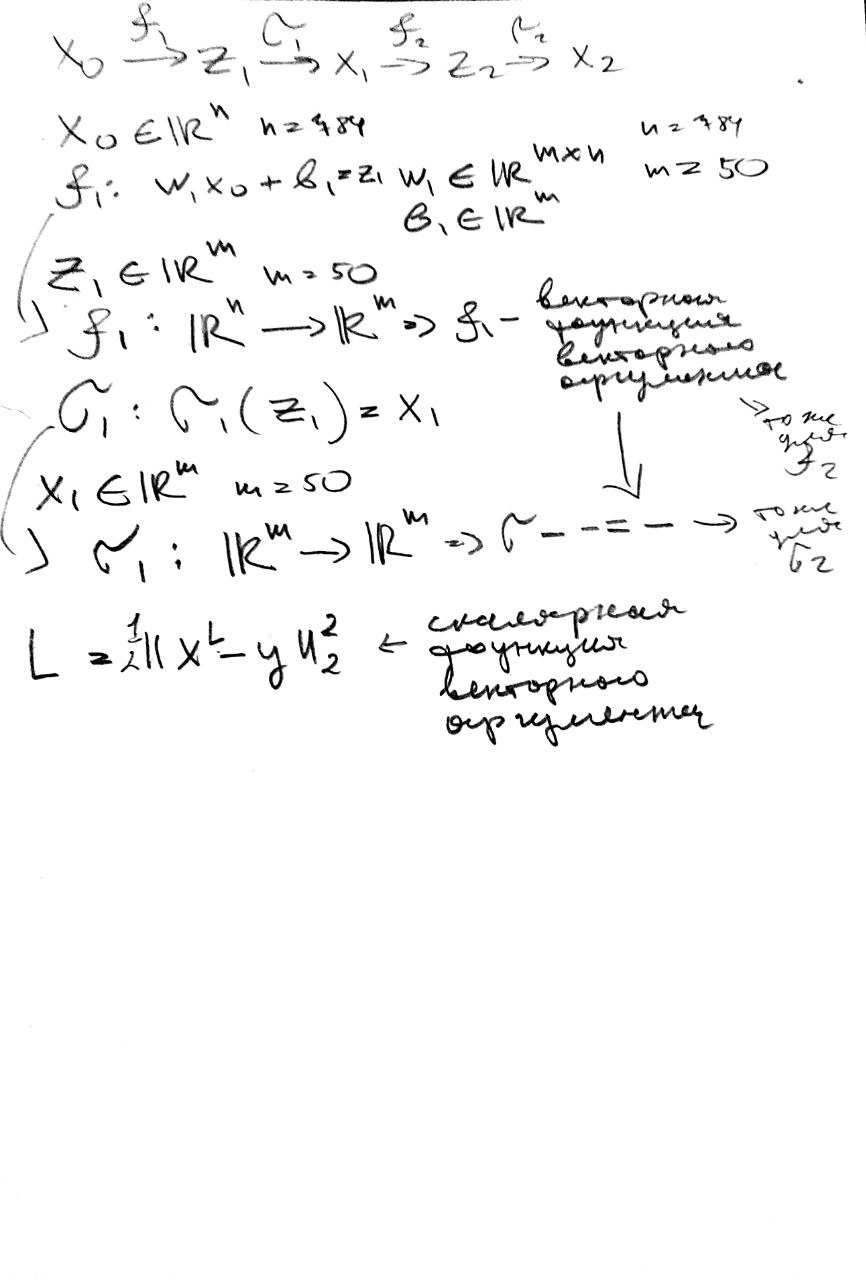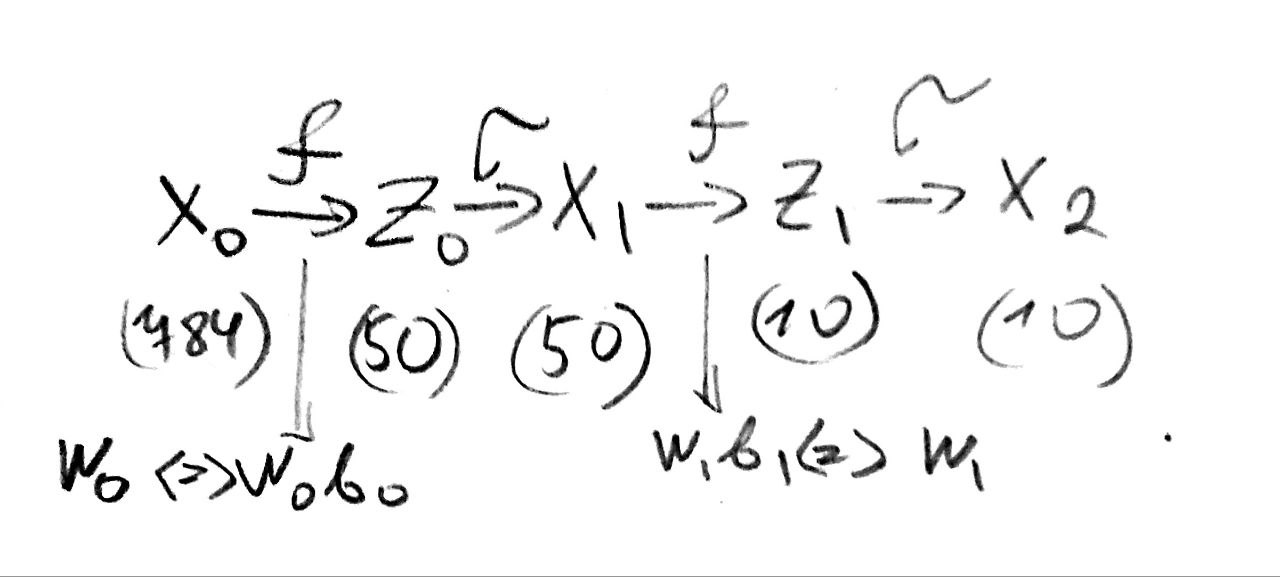

# Обучение

In [262]:
import math
import torch

def sigma(x):
    return x.tanh()

def dsigma(x):
    return 1 - x.tanh().pow(2)

def loss(v, t):
    return (1/2)*(v - t).pow(2).sum()

def dloss(v, t):
    return (v-t)

def forward_pass(w1, b1, w2, b2, x):
    x0 = x
    s1 = w1.mv(x0) + b1
    x1 = sigma(s1)
    s2 = w2.mv(x1) + b2
    x2 = sigma(s2)

    return x0, s1, x1, s2, x2


In [263]:
def backward_pass(
        w1, b1,
        w2, b2,
        y,
        x0,
        z1, x1,
        z2, x2,
        dl_dw1, dl_db1,
        dl_dw2, dl_db2):

    #comments to establish the connection between lectures notation (used in code) and mine

    dl_dx2 = dloss(x2, y) # nabla_x2_loss
    dl_dz2 = dl_dx2 * dsigma(z2) # nabla_x2_loss * jac_sig2_z2

    dl_dw2.add_(dl_dz2.view(-1, 1).mm(x1.view(1, -1))) # (nabla_x2_loss * jac_sig2_z2) @ nabla_w2_z2
    dl_db2.add_(dl_dz2) # (nabla_x2_loss * jac_sig2_z2) @ nabla_b2_z2

    dl_dx1 = w2.t().mv(dl_dz2) # (nabla_x2_loss * jac_sig2_z2) @ nabla_x1_z2
    dl_dz1 = dl_dx1 * dsigma(z1) # ((nabla_x2_loss * jac_sig2_z2) @ nabla_w2_z2) * jac_sig1_z1

    dl_dw1.add_(dl_dz1.view(-1, 1).mm(x0.view(1, -1))) # (((nabla_x2_loss * jac_sig2_z2) @ nabla_w2_z2) * jac_sig1_z1) @ nabla_w1_z1
    dl_db1.add_(dl_dz1) # (((nabla_x2_loss * jac_sig2_z2) @ nabla_w2_z2) * jac_sig1_z1) @ nabla_b1_z1

In [264]:
zeta = 0.90

train_target = train_target * zeta
test_target = test_target * zeta

nb_hidden = 50
eta = 1e-1 / nb_train_samples
epsilon = 1e-3

w1 = torch.empty(nb_hidden, train_input.size(1)).normal_(0, epsilon)
b1 = torch.empty(nb_hidden).normal_(0, epsilon)
w2 = torch.empty(nb_classes, nb_hidden).normal_(0, epsilon)
b2 = torch.empty(nb_classes).normal_(0, epsilon)

dl_dw1 = torch.empty(w1.size())
dl_db1 = torch.empty(b1.size())
dl_dw2 = torch.empty(w2.size())
dl_db2 = torch.empty(b2.size())

for k in range(1000):

    # Back-prop

    acc_loss = 0
    nb_train_errors = 0

    dl_dw1.zero_()
    dl_db1.zero_()
    dl_dw2.zero_()
    dl_db2.zero_()

    for n in range(nb_train_samples):
        x0, s1, x1, s2, x2 = forward_pass(w1, b1, w2, b2, train_input[n])

        pred = x2.max(0)[1].item()

        if one_hot_train_target[n,pred] < 0.5:
            nb_train_errors = nb_train_errors + 1

        acc_loss = acc_loss + loss(x2, one_hot_train_target[n])

        backward_pass(w1, b1, w2, b2,
                      one_hot_train_target[n],
                      x0, s1, x1, s2, x2,
                      dl_dw1, dl_db1, dl_dw2, dl_db2)

    # Gradient step

    w1 = w1 - eta * dl_dw1
    b1 = b1 - eta * dl_db1
    w2 = w2 - eta * dl_dw2
    b2 = b2 - eta * dl_db2

    # Test error

    nb_test_errors = 0

    for n in range(test_input.size(0)):
        _, _, _, _, x2 = forward_pass(w1, b1, w2, b2, test_input[n])

        pred = x2.max(0)[1].item()

        if one_hot_test_target[n, pred] < 0.5:
             nb_test_errors = nb_test_errors + 1

    print('{:d} acc_train_loss {:.02f} acc_train_error {:.02f}% test_error {:.02f}%'
          .format(k,
                  acc_loss,
                  (100 * nb_train_errors) / train_input.size(0),
                  (100 * nb_test_errors) / test_input.size(0)))

0 acc_train_loss 29987.24 acc_train_error 90.86% test_error 90.15%
1 acc_train_loss 29405.14 acc_train_error 90.06% test_error 79.00%
2 acc_train_loss 28915.03 acc_train_error 79.13% test_error 84.83%
3 acc_train_loss 28516.04 acc_train_error 85.00% test_error 86.32%
4 acc_train_loss 28178.98 acc_train_error 86.63% test_error 85.00%
5 acc_train_loss 27885.23 acc_train_error 85.48% test_error 80.14%
6 acc_train_loss 27629.07 acc_train_error 80.91% test_error 69.76%
7 acc_train_loss 27403.30 acc_train_error 70.71% test_error 59.65%
8 acc_train_loss 27207.33 acc_train_error 60.93% test_error 55.39%
9 acc_train_loss 27042.22 acc_train_error 56.04% test_error 54.30%
10 acc_train_loss 26903.92 acc_train_error 54.64% test_error 52.90%
11 acc_train_loss 26785.20 acc_train_error 53.43% test_error 50.23%
12 acc_train_loss 26671.45 acc_train_error 50.84% test_error 46.24%
13 acc_train_loss 26548.25 acc_train_error 47.03% test_error 42.80%
14 acc_train_loss 26403.49 acc_train_error 43.20% test_err

KeyboardInterrupt: 